Aşağıdaki kod bloğunda mypgmwrite ve mypgmread fonksiyonları yer almaktadır.

In [138]:
def mypgmwrite(fileName, k, magicNumber, comment, width, height, intensity):
    maxVal = 2**k - 1
    with open(fileName, "wb") as file:
        file.write(magicNumber.encode() + b"\n")
        if comment:
            file.write(comment.encode() + b"\n")
        file.write(str(width).encode() + b" " + str(height).encode() + b"\n")
        file.write(str(maxVal).encode() + b"\n")
        file.write(intensity)


def mypgmread(fileName):
    with open(fileName, "rb") as file:
        header = file.readline().decode(encoding="ascii").strip()
        comment = file.readline().decode(encoding="ascii").strip()
        if header not in "P5":
            return print("The read file is not a binary encoded (P5 format) PGM file!")

        sizeInfo = file.readline().decode(encoding="ascii").strip()
        width, height = map(int, sizeInfo.split())

        maxVal = file.readline().decode(encoding="ascii").strip()
        kVal = int(
            mylog2(int(maxVal) + 1)
        )  # Okunan maxVal değerini byte karşılığında ifade etme işlemi

        intensity = file.read()

        return kVal, header, comment, width, height, intensity


def mylog2(input):
    # Bu fonksiyon 2 tabanında logaritma alma işlemini gerçekleştirir, math kütüphanesini kullanmaktan kaçınmak maksadıyla oluşturuldu
    if input == 0:
        return 0
    elif input == 1:
        return 0
    elif input == 2:
        return 1
    else:
        return 1 + mylog2(input / 2)

Aşağıdaki kod bloğunda okunan bir dosyanın doğruca yazılması işlemi gerçekleştirilmektedir. Okunan bir dosyanın yazdırılarak hem okuma hem de yazma fonksiyonlarının test edilmesini sağlamak maksadıyla oluşturulmuştur.

In [139]:
def myReadAndWriteReceived(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)
    mypgmwrite(outputFile, kVal, header, comment, width, height, receivedIntensity)

Aşağıdaki kod bloğu okunan bir görüntünün negatife dönüşümünü sağlamaktadır.

In [140]:
def myImageNegative(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Negatife çevirme işlemi her pixelin değerinin azami pixel değerinden çıkarılmasıyla gerçekleştirilir:
    maxVal = 2**kVal - 1
    negativeIntensity = b""
    for pixel in receivedIntensity:
        negativePixel = maxVal - pixel
        negativeIntensity += bytes([negativePixel])

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, negativeIntensity
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda matplotlib kullanılarak görüntüyü çizdirme işlemi çeşitli layoutlarda gerçekleştirilir.

In [141]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def myPGMDisplay(pgmFile, title):
    image = mpimg.imread(pgmFile)  # pgm dosyasını oku
    plt.imshow(image, cmap="gray")  # görüntüyü gray map'leme ile göster
    plt.title(title)  # plota title ekle
    plt.show()


""" İkili """


def myPGMDisplayDouble(pgmFile, pgmFileOther, title, titleOther, description):
    # Görüntüyü oku
    image = mpimg.imread(pgmFile)
    imageOther = mpimg.imread(pgmFileOther)

    # İki subplot'lu figure oluştur
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # İlk görüntüyü ilk subplot'ta göster
    axes[0].imshow(image, cmap="gray")
    axes[0].set_title(title)

    # İkinci görüntüyü ikinci subplot'ta göster
    axes[1].imshow(imageOther, cmap="gray")
    axes[1].set_title(titleOther)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, -0.05, description, ha="center")

    plt.show()  # plot'u göster


""" Üçlü """


def myPGMDisplayTriple(
    pgmFile1, pgmFile2, pgmFile3, title1, title2, title3, description
):
    # Görüntüyü oku
    image1 = mpimg.imread(pgmFile1)
    image2 = mpimg.imread(pgmFile2)
    image3 = mpimg.imread(pgmFile3)

    # Üç subplot'lu figure oluştur
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(image1, cmap="gray")
    axes[0].set_title(title1)

    axes[1].imshow(image2, cmap="gray")
    axes[1].set_title(title2)

    axes[2].imshow(image3, cmap="gray")
    axes[2].set_title(title3)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, 0, description, ha="center")

    plt.show()  # plot'u göster


""" Dörtlü """


def myPGMDisplayQuadra(
    pgmFile1, pgmFile2, pgmFile3, pgmFile4, title1, title2, title3, title4, description
):
    # Görüntüyü oku
    image1 = mpimg.imread(pgmFile1)
    image2 = mpimg.imread(pgmFile2)
    image3 = mpimg.imread(pgmFile3)
    image4 = mpimg.imread(pgmFile4)

    # Dört subplot'lu figure oluştur
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))

    # Görüntüleri subplot'ta göster
    axes[0, 0].imshow(image1, cmap="gray")
    axes[0, 0].set_title(title1)

    axes[0, 1].imshow(image2, cmap="gray")
    axes[0, 1].set_title(title2)

    axes[1, 0].imshow(image3, cmap="gray")
    axes[1, 0].set_title(title3)

    axes[1, 1].imshow(image4, cmap="gray")
    axes[1, 1].set_title(title4)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, -0.07, description, ha="center")

    plt.show()  # plot'u göster


""" Altılı """


def myPGMDisplayHexa(
    pgmFile1,
    pgmFile2,
    pgmFile3,
    pgmFile4,
    pgmFile5,
    pgmFile6,
    title1,
    title2,
    title3,
    title4,
    title5,
    title6,
    description,
):
    # Görüntüyü oku
    image1 = mpimg.imread(pgmFile1)
    image2 = mpimg.imread(pgmFile2)
    image3 = mpimg.imread(pgmFile3)
    image4 = mpimg.imread(pgmFile4)
    image5 = mpimg.imread(pgmFile5)
    image6 = mpimg.imread(pgmFile6)

    # Altı subplot'lu figure oluştur
    fig, axes = plt.subplots(3, 2, figsize=(12, 8))

    # Görüntüleri subplot'ta göster
    axes[0, 0].imshow(image1, cmap="gray")
    axes[0, 0].set_title(title1)

    axes[0, 1].imshow(image2, cmap="gray")
    axes[0, 1].set_title(title2)

    axes[1, 0].imshow(image3, cmap="gray")
    axes[1, 0].set_title(title3)

    axes[1, 1].imshow(image4, cmap="gray")
    axes[1, 1].set_title(title4)

    axes[2, 0].imshow(image5, cmap="gray")
    axes[2, 0].set_title(title5)

    axes[2, 1].imshow(image6, cmap="gray")
    axes[2, 1].set_title(title6)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, -0.05, description, ha="center")

    plt.show()  # plot'u göster

Aşağıdaki kod bloğunda log transformation fonksiyonu tanımlanmıştır.

In [142]:
def myLogTransform(inputFile, outputFile, c):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Log transformasyonu gerçekleştirilir:
    logTransformedIntensity = b""
    for pixel in receivedIntensity:
        logTransformedPixel = round(myLog(pixel + 1) * c)
        logTransformedIntensity += bytes([logTransformedPixel])

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, logTransformedIntensity
    )  # işlenen görüntü yazdırılır


def myLog(input):
    # math kütüphanesini import etmemek amacıyla 10 tabanında log alan fonksiyon
    if input <= 0:
        raise ValueError("Input pozitif olmak zorundadır!")
    log = 0
    while input > 1:
        input /= 2
        log += 1

    return log

Aşağındaki kod bloğunda gamma correction fonksiyonu yer almaktadır.

In [143]:
def myGammaCorrection(inputFile, outputFile, c, gamma):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Alınan intensity elemanlarına gamma correction uygulanır:
    correctedIntensity = [c * (x**gamma) for x in receivedIntensity]

    # 0-255 arasına map'lenir
    minIntensity = min(correctedIntensity)
    maxIntensity = max(correctedIntensity)
    normalizedIntensity = [
        (255 * (x - minIntensity) / (maxIntensity - minIntensity))
        for x in correctedIntensity
    ]

    # Gamma Correction uygulanıp normalize edilen elemanlar Byte'ye convert edilir
    gammaCorrectedIntensityBytes = bytes(int(x) for x in normalizedIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, gammaCorrectedIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağındaki kod bloğunda görüntü yumuşatma fonksiyonu yer almaktadır.

Derste değinildiği gibi iç içe döngü oluşturarak maske görüntüye uygulandı. Benim için en zorlayıcı kısım bu fonksiyonun beklendiği gibi çalışması oldu.

In [144]:
def myImageCorrelation(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Correlation gerçekleştirilir:
    correlatedIntensity = []
    for y in range(height):
        for x in range(width):
            correlatedPixel = 0
            for i in range(len(m)):
                for j in range(len(m[0])):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        correlatedPixel += (
                            receivedIntensity[(y + i) * width + (x + j)] * m[i][j]
                        )

            # Yumuşatılan pixel array'a yazılır:
            correlatedPixel /= (2 * len(m) // 2 + 1) ** 2
            correlatedIntensity.append(round(correlatedPixel))

    # Array byte'ye convert edilir:
    correlatedIntensityBytes = bytes(correlatedIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, correlatedIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağındaki kod bloğunda averaging mask yöntemiyle impulse noise tipindeki gürültüyü gideren fonksiyon yer almaktadır.

In [145]:
def myAveragingMask(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Averaging Mask yöntemiyle gürültü giderilmesi işlemi:
    averagingMaskedIntensity = []
    for y in range(height):
        for x in range(width):
            averagingMaskedPixel = 0
            for i in range(len(m) // 2, len(m) // 2 + 1):
                for j in range(len(m[0]) // 2, len(m[0]) // 2 + 1):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        averagingMaskedPixel += (
                            receivedIntensity[(y + i) * width + (x + j)]
                            * m[i + len(m) // 2][j + len(m[0]) // 2]
                        )

            # Gürültüsü giderilen pixel array'a yazılır, 0-255 arasında değerlendirilir:
            averagingMaskedPixel = max(0, min(255, round(averagingMaskedPixel)))
            averagingMaskedIntensity.append(averagingMaskedPixel)

    # Array byte'ye convert edilir:
    averagingMaskedIntensityBytes = bytes(averagingMaskedIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, averagingMaskedIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağındaki kod bloğunda median filter yöntemiyle impulse noise tipindeki gürültüyü gideren fonksiyon yer almaktadır.

In [146]:
def myMedianFilter(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Median Filter yöntemiyle gürültü giderilmesi işlemi:
    medianFilteredIntensity = []
    for y in range(height):
        for x in range(width):
            medianFilteredPixel = []
            for i in range(-len(m) // 2, len(m) // 2 + 1):
                for j in range(-len(m[0]) // 2, len(m[0]) // 2 + 1):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        medianFilteredPixel.append(
                            receivedIntensity[(y + i) * width + (x + j)]
                            * m[i + len(m) // 2][j + len(m[0]) // 2]
                        )

            # Gürültüsü giderilen pixel array'a yazılır:
            medianFilteredPixel.sort()
            medianFilteredIntensity.append(
                medianFilteredPixel[len(medianFilteredPixel) // 2]
            )

    # Array byte'ye convert edilir:
    medianFilteredIntensityBytes = bytes(medianFilteredIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, medianFilteredIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda histogram equalizing fonksiyonu yer almaktadır.

In [147]:
def myHistogramEqualize(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Histogram oluşturulur
    histogram = [0 for i in range(256)]
    for pixel in receivedIntensity:
        histogram[pixel] += 1

    # Eşitleme fonksiyonu hesaplanır
    equalizationFunction = [0 for i in range(256)]
    for i in range(256):
        for j in range(i + 1):
            equalizationFunction[i] += histogram[j]
        equalizationFunction[i] = round(
            equalizationFunction[i] * 255 / (width * height)
        )

    # Görüntü eşitlenir
    equalizedIntensity = []
    for pixel in receivedIntensity:
        equalizedIntensity.append(equalizationFunction[pixel])

    equalizedIntensityBytes = bytes(equalizedIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, equalizedIntensityBytes
    )  # işlenen görüntü yazdırılır

    return (
        histogram,
        equalizationFunction,
    )  # histogram grafiği için histogram, s=T(r) grafiği için equalizationFunction değişkenleri döndürülür

Aşağıdaki kod bloğunda histogram equalization işlemindeki histogram grafiği çizdirilir.

In [148]:
""" Üçlü plot mantığıyla iki görüntü dosyası bir de histogram grafiği göstermektedir """


def myHistogramGraphDraw(
    pgmFile1, pgmFile2, histogram, title1, title2, title3, description
):
    # Görüntüyü oku
    image1 = mpimg.imread(pgmFile1)
    image2 = mpimg.imread(pgmFile2)

    # Üç subplot'lu figure oluştur
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(image1, cmap="gray")
    axes[0].set_title(title1)

    axes[1].imshow(image2, cmap="gray")
    axes[1].set_title(title2)

    axes[2].plot(histogram)
    axes[2].set_title(title3)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, 0, description, ha="center")

    plt.show()

Aşağıdaki kod bloğunda histogram equalizing fonksiyonunda oluşan s=T(r) fonksiyonu grafiğini çizdiren fonksiyon yer almaktadır.

In [149]:
def myDrawSFunctionGraph(s1, s2, s3, s4, title1, title2, title3, title4, description):
    # Dört subplot'lu figure oluştur
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))

    axes[0, 0].plot(range(256), s1)
    axes[0, 0].set_title(title1)

    axes[0, 1].plot(range(256), s2)
    axes[0, 1].set_title(title2)

    axes[1, 0].plot(range(256), s3)
    axes[1, 0].set_title(title3)

    axes[1, 1].plot(range(256), s4)
    axes[1, 1].set_title(title4)

    plt.tight_layout()  # subplot layout'unu sıklaştır
    fig.text(0.5, 0, description, ha="center")

    plt.show()

Aşağıdaki kod bloğunda scale etmeyen Laplacian fonksiyonu yer almaktadır.

In [150]:
def myLaplacianWithoutScaling(inputFile, mask):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Laplacian filtresi oluşturulur
    laplacianFilter = mask

    # Görüntü Laplacian filtresi ile işlemden geçirilir
    processedIntensity = []
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            filteredPixel = 0
            for k in range(-1, 2):
                for l in range(-1, 2):
                    filteredPixel += (
                        laplacianFilter[k + 1][l + 1]
                        * receivedIntensity[(i + k) * width + (j + l)]
                    )
            processedIntensity.append(filteredPixel)

    return processedIntensity  # işlenen görüntü döndürülür

Aşağıdaki kod bloğunda scale eden Laplacian fonksiyonu yer almaktadır.

In [151]:
def myLaplacianWithScaling(inputFile, outputFile, mask):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Alınan veri listelenir
    inputImage = [
        receivedIntensity[i : i + width]
        for i in range(0, len(receivedIntensity), width)
    ]

    # Laplacian filtresi uygulanmış sonuçları tutacak liste oluşturulur
    processedIntensity = [[0] * width for _ in range(height)]

    # Laplacian filtresi uygulanır
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            laplacianSum = 0
            for i in range(3):
                for j in range(3):
                    laplacianSum += inputImage[y + i - 1][x + j - 1] * mask[i][j]
            processedIntensity[y][x] = laplacianSum

    # Laplacian filtreli sonuçlar [0, 255] arasına ölçeklenir
    maxVal = max(map(max, processedIntensity))
    minVal = min(map(min, processedIntensity))
    scalingFactor = 255 / (maxVal - minVal)
    scaledIntensity = [
        [int((x - minVal) * scalingFactor) for x in row] for row in processedIntensity
    ]

    # Ölçeklendirilmiş veri düzleştirilirek byte cinsine çevrilir
    processedIntensity = [val for row in scaledIntensity for val in row]
    processedIntensityBytes = bytes(processedIntensity)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, processedIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda Figure 3.38 (d) için Figure 3.37'de yer alan image sharpening işlemi uygulanmaktadır.

In [152]:
def mySharpenUsingLaplacian(inputFile, outputFile, mask):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    # Alınan veri listelenir
    inputImage = [
        receivedIntensity[i : i + width]
        for i in range(0, len(receivedIntensity), width)
    ]

    # Keskinleştirilmiş verinin tutulacağı liste
    sharpenedIntensity = [[0] * width for _ in range(height)]

    # Laplacian filtresi uygulanır
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            laplacianSum = 0
            for i in range(3):
                for j in range(3):
                    laplacianSum += inputImage[y + i - 1][x + j - 1] * mask[i][j]
            sharpenedIntensity[y][x] = receivedIntensity[y * width + x] - laplacianSum

    # Veriler [0, 255] aralığında ölçeklenir
    for y in range(height):
        for x in range(width):
            sharpenedIntensity[y][x] = max(0, min(255, sharpenedIntensity[y][x]))

    # Keskinleştirilmiş veri PGM'e yazdırılmak için düzleştirilerek ölçeklenir ve byte cinsinden dönüşümü gerçekleştirilir
    sharpenedIntensityScaled = [val for row in sharpenedIntensity for val in row]
    sharpenedIntensityBytes = bytes(sharpenedIntensityScaled)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, sharpenedIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda Gaussian filter ile görüntüyü yumuşatan fonksiyon yer almaktadır. 

In [153]:
def myGaussianBlur(inputFile, outputFile, maskSize, sigma):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)

    # receivedIntensity'i 2 boyutlu listeye çevirilir
    inputImage = [
        receivedIntensity[i : i + width]
        for i in range(0, len(receivedIntensity), width)
    ]

    # 2 boyutlu gaussian kernel oluşturulur
    kernel = [[0] * maskSize for _ in range(maskSize)]
    kernelCenter = maskSize // 2
    kernelSum = 0

    for i in range(maskSize):
        for j in range(maskSize):
            x = i - kernelCenter
            y = j - kernelCenter
            kernel[i][j] = (1 / (2 * 3.1416 * sigma**2)) * (
                2.71828 ** (-1 * (x**2 + y**2) / (2 * sigma**2))
            )
            kernelSum += kernel[i][j]

    for i in range(maskSize):
        for j in range(maskSize):
            kernel[i][j] /= kernelSum

    # Yumuşatılmış görüntü verisini tutacak liste
    blurredIntensity = [[0] * width for _ in range(height)]

    # Gaussian filtresi uygulanır
    for y in range(height):
        for x in range(width):
            weightedSum = 0
            for i in range(maskSize):
                for j in range(maskSize):
                    neighborX = x + i - kernelCenter
                    neighborY = y + j - kernelCenter
                    if 0 <= neighborX < width and 0 <= neighborY < height:
                        weightedSum += inputImage[neighborY][neighborX] * kernel[i][j]
            blurredIntensity[y][x] = int(weightedSum)

    # Yumuşatılmış görüntü içeriği düzleştirilip byte cinsine çevrilir
    blurredIntensityFlatten = [val for row in blurredIntensity for val in row]
    blurredIntensityBytes = bytes(blurredIntensityFlatten)

    mypgmwrite(
        outputFile, kVal, header, comment, width, height, blurredIntensityBytes
    )  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda 2 boyutlu discrete fast Fourier transform fonksiyonu yer almaktadır.

In [154]:
import numpy as np


def my1Dfft(input):
    return np.fft.fft(input)


def my2Dfft(intensity, width, height):
    # intensity'i 2 boyutlu listeye çevirilir
    intensityList = np.frombuffer(intensity, dtype=np.uint8).reshape((height, width))

    intensityList = intensityList.astype(np.float64)

    rowsFFT = np.zeros_like(intensityList, dtype=np.complex128)

    # satırlara fft uygulama
    for i in range(height):
        rowsFFT[i, :] = my1Dfft(intensityList[i, :])

    columnsFFT = np.zeros_like(intensityList, dtype=np.complex128)

    # sütunlara fft uygulama
    for i in range(width):
        columnsFFT[:, i] = my1Dfft(rowsFFT[:, i])

    shifted = np.fft.fftshift(columnsFFT)  # DC'yi merkeze alma

    magnitude = 20 * np.log(np.abs(shifted) + 1)
    normalize = (magnitude / np.max(magnitude)) * 255

    return normalize.astype(
        np.uint8
    ).tobytes()  # ölçeklenen veri byte cinsine çevrilerek döndürülür

Aşağıdaki main kod bloğunda verilen görüntünün Fourier transformu gerçekleştirilmiştir.

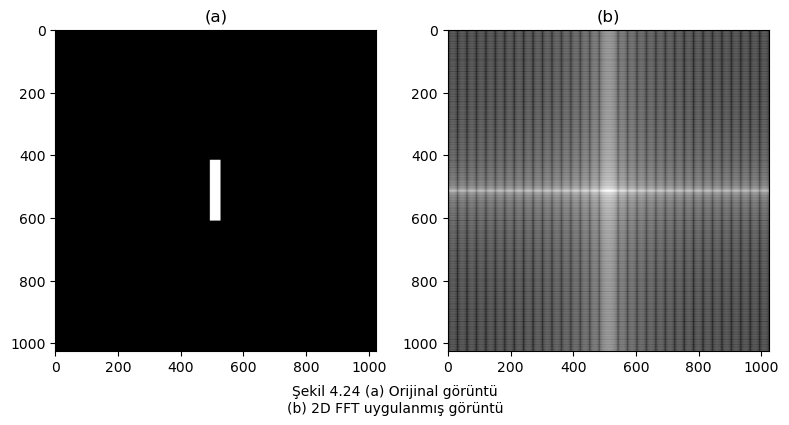

In [155]:
if __name__ == "__main__":
    originalImage = "Fig0424(a)(rectangle).pgm"
    outputImage = "2dfft_Fig0424.pgm"
    kVal, header, comment, width, height, receivedIntensity = mypgmread(originalImage)
    outputIntensity = my2Dfft(receivedIntensity, width, height)
    mypgmwrite(
        outputImage, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    title1 = "(a)"
    title2 = "(b)"
    description = "Şekil 4.24 (a) Orijinal görüntü\n(b) 2D FFT uygulanmış görüntü"
    myPGMDisplayDouble(originalImage, outputImage, title1, title2, description)

2DIFFT fonksiyonu: bu fonksiyonu oluşturamadım çünkü fft shift işleminde bir problem olduğunu düşünüyorum

In [156]:
# def myInverse2Dfft(intensity, width, height):
#     intensityList = np.frombuffer(intensity, dtype=np.uint8).reshape((height, width))

#     intensityList = intensityList.astype(np.complex128)

#     shifted = np.fft.ifftshift(intensityList)

#     rowsIFFT = np.zeros_like(shifted, dtype=np.complex128)

#     for i in range(height):
#         rowsIFFT[i, :] = my1Difft(shifted[i, :])

#     columnsIFFT = np.zeros_like(shifted, dtype=np.complex128)

#     for i in range(width):
#         columnsIFFT[:, i] = my1Difft(rowsIFFT[:, i])

#     normalized_intensity = np.abs(columnsIFFT)
#     normalized_intensity = (normalized_intensity / np.max(normalized_intensity)) * 255

#     return normalized_intensity.astype(
#         np.uint8
#     )  # ölçeklenen veri byte cinsine çevrilerek döndürülür


# def myInverse2Dfft(fft):
#     # Compute the complex conjugate of the forward transform
#     conjugate_transform = np.conj(fft)

#     # Obtain the inverse Fourier transform by dividing the conjugate by the length of the signal
#     inverse_transform = conjugate_transform / len(fft)

#     # The inverse transform represents the reconstructed signal
#     return np.fft.ifft(inverse_transform)


# if __name__ == "__main__":
#     originalImage = "2dfft_Fig0424.pgm"
#     outputImage = "2difft_Fig0424.pgm"

#     kVal, header, comment, width, height, receivedIntensity = mypgmread(originalImage)

#     outputIntensity = myInverse2Dfft(receivedIntensity)

#     mypgmwrite(
#         outputImage, kVal, header, comment, width, height, outputIntensity.tobytes()
#     )

#     title1 = "(a)"
#     title2 = "(b)"
#     description = "Şekil 4.24 (a) Orijinal görüntü\n(b) 2D FFT uygulanmış görüntü"
#     myPGMDisplayDouble(originalImage, outputImage, title1, title2, description)

Lab4

In [157]:
def myApplySobel(intensity, width, height):
    def getPixel(intensity, x, y):
        if x < 0 or y < 0 or x >= width or y >= height:
            return 0
        return intensity[x + y * width]

    result = bytearray(width * height)
    Gx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    Gy = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

    for y in range(height):
        for x in range(width):
            GxSum = 0
            GySum = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    gradientX = getPixel(intensity, x + i, y + j)
                    gradientY = getPixel(intensity, x + i, y + j)
                    GxSum += Gx[i + 1][j + 1] * gradientX
                    GySum += Gy[i + 1][j + 1] * gradientY
            result[x + y * width] = min(int((abs(GxSum) + abs(GySum)) // 2), 255)
    return result

def mySobel(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(
        inputFile
    )  # görüntü okunarak veriler çekilir

    outputIntensity = myApplySobel(receivedIntensity, width, height)


    mypgmwrite(
        outputFile, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

In [158]:
def myMaskImages(image1, image2, outputImage):
    kVal, header, comment, width, height, intensity1 = mypgmread(
        image1
    )  # 1. görüntü okunarak veriler çekilir
    _, _, _, _, _, intensity2 = mypgmread(image2)

    maskedImage = bytearray(width * height)
    for i in range(width * height):
        pixelVal = min(intensity1[i] * intensity2[i] // 255, 255)
        maskedImage[i] = pixelVal

    mypgmwrite(
        outputImage, kVal, header, comment, width, height, maskedImage
    )  # işlenen görüntü yazdırılır

In [159]:
def mySumImages(image1, image2, outputImage):
    kVal, header, comment, width, height, intensity1 = mypgmread(
        image1
    )  # 1. görüntü okunarak veriler çekilir
    _, _, _, _, _, intensity2 = mypgmread(image2)

    summedImage = bytearray(width * height)
    for i in range(width * height):
        pixelSum = min(intensity1[i] + intensity2[i], 255)
        summedImage[i] = pixelSum

    mypgmwrite(
        outputImage, kVal, header, comment, width, height, summedImage
    )  # işlenen görüntü yazdırılır

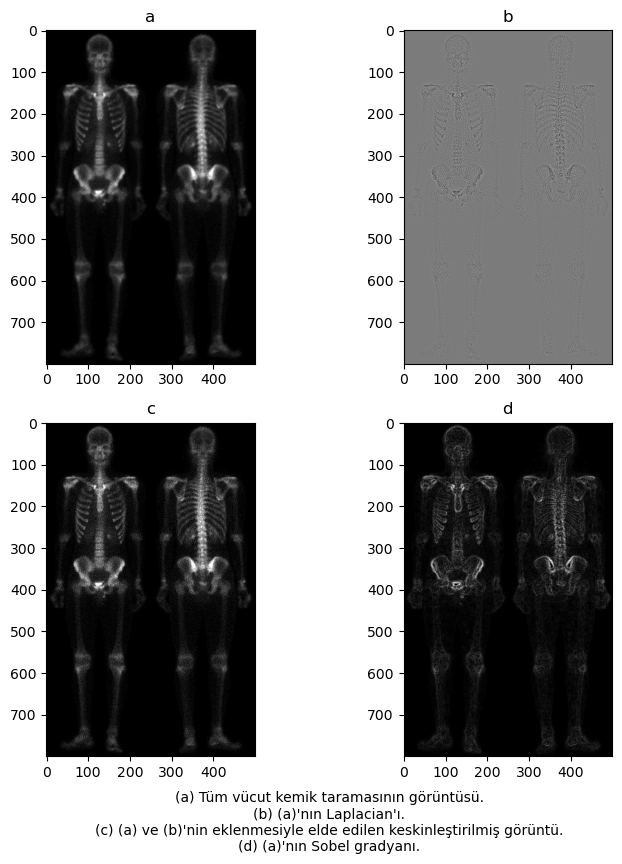

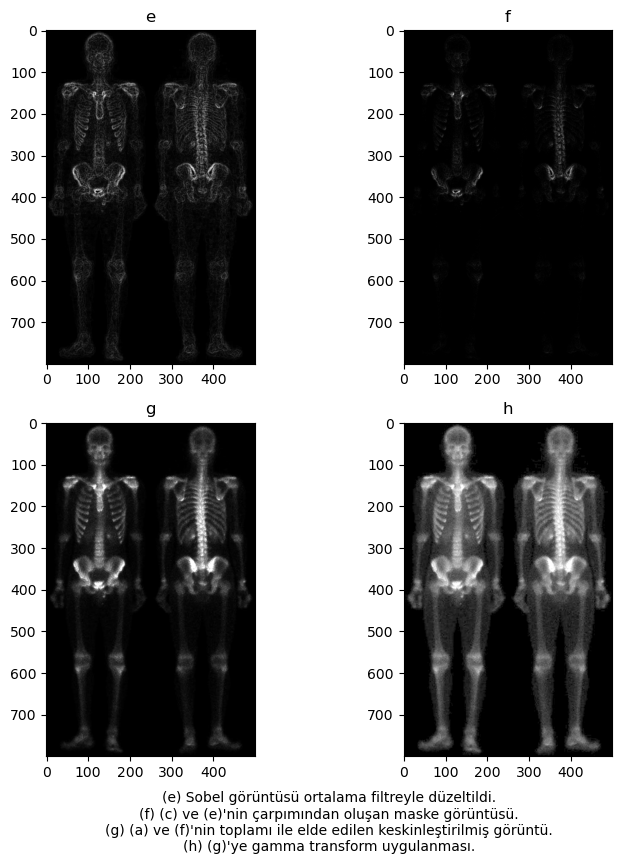

In [160]:
if __name__ == "__main__":
    fig343a = "Fig0343(a)(skeleton_orig).pgm"

    # fig343b için laplacian spatial domain'de uygulandı
    fig343b = "Fig0343_b.pgm"
    mask = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
    myLaplacianWithScaling(fig343a, fig343b, mask)

    # fig343c için laplacian spatial domain'de uygulandı
    fig343c = "Fig0343_c.pgm"
    mySharpenUsingLaplacian(fig343a, fig343c, mask)

    fig343d = "Fig0343_d.pgm"
    mySobel(fig343a, fig343d)

    fig343e = "Fig0343_e.pgm"
    averagingMask = [1, 1, 1]
    m = [averagingMask]
    n = 5
    m = m * n
    myAveragingMask(fig343d, fig343e, m)

    fig343f = "Fig0343_f.pgm"
    myMaskImages(fig343c, fig343e, fig343f)

    fig343g = "Fig0343_g.pgm"
    mySumImages(fig343a, fig343f, fig343g)

    fig343h = "Fig0343_h.pgm"
    myGammaCorrection(fig343g, fig343h, c=1, gamma=0.5)

    description = "(a) Tüm vücut kemik taramasının görüntüsü.\n(b) (a)'nın Laplacian'ı.\n(c) (a) ve (b)'nin eklenmesiyle elde edilen keskinleştirilmiş görüntü.\n(d) (a)'nın Sobel gradyanı."
    myPGMDisplayQuadra(
        fig343a,
        fig343b,
        fig343c,
        fig343d,
        "a",
        "b",
        "c",
        "d",
        description
    )

    description2 = "(e) Sobel görüntüsü ortalama filtreyle düzeltildi.\n(f) (c) ve (e)'nin çarpımından oluşan maske görüntüsü.\n(g) (a) ve (f)'nin toplamı ile elde edilen keskinleştirilmiş görüntü.\n(h) (g)'ye gamma transform uygulanması."
    myPGMDisplayQuadra(
        fig343e,
        fig343f,
        fig343g,
        fig343h,
        "e",
        "f",
        "g",
        "h",
        description2
    )

(a): orijinal görüntü

(b): Laplacian alınarak görüntüde kenar tespiti ve görüntü yoğunluklarındaki değişimler ortaya konur. Bu işlem frekans domeninde yapılabilmektedir, fakat Inverse FFT uygulanamadığından spatial domain'de işlem gerçekleştirildi. mask = [[0, 1, 0], [1, -4, 1], [0, 1, 0]] olarak seçildi, fakat mask = [[1, 1, 1], [1, -8, 1], [1, 1, 1]] uygulandığında da gözle görülür bir fark olmadığı gözlemlendi.

(c): Laplacian filtresi kullanılarak görüntüde keskinleştirme uygulanır. Laplacian sharpening frekans düzleminde de uygulanabilmektedir.

(d): Sobel işlemi görüntüde kenar tespiti için kullanılmaktadır. Kenarları belirlemede ve vurgulamada kullanılır. Bu işlem zaman düzleminde gerçekleştirilebilmektedir.

(e): Sobel işlemi uygulanan görüntüye, (d), averaging mask uygulanarak yumuşatma işlemi gerçekleştirildi. Average masking işlemi yalnızca zaman domeninde gerçekleştirilebilir.

(f): c görüntüsü e görüntüsüne elementer çarpım yapılarak maskelendi. Bu işlem zaman düzleminde uygulanabilmektedir.

(g): a ve f görüntülerinin yoğunlukları birbiriyle toplanarak iki görüntü birleştirildi ve keskinleştirilmiş görüntü elde edildi. Bu işlem zaman domeninde uygulanabilir.

(h): g'deki görüntüye gamma transform uygulanarak kontrast ve parlaklık gibi değerlerin esnetilmesiyle görüntüdeki gizli kalmış bazı ayrıntılar açığa çıkarılır. Bu işlem de zaman domeninde uygulanabilmektedir.

Inverse FFT uygulanamadığından aşağıda yalnızca her aşamadaki görüntünün frekans domenindeki görünüşüne yer verildi.

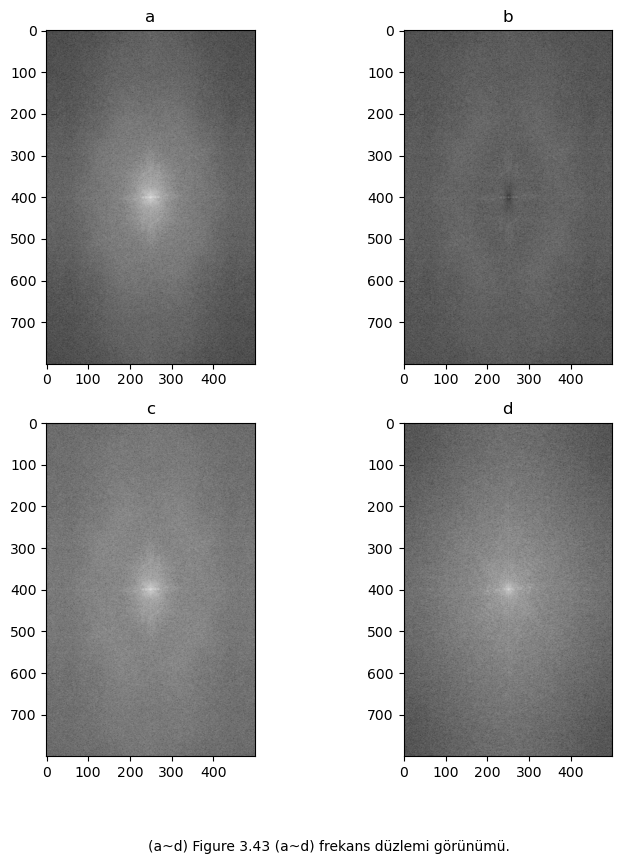

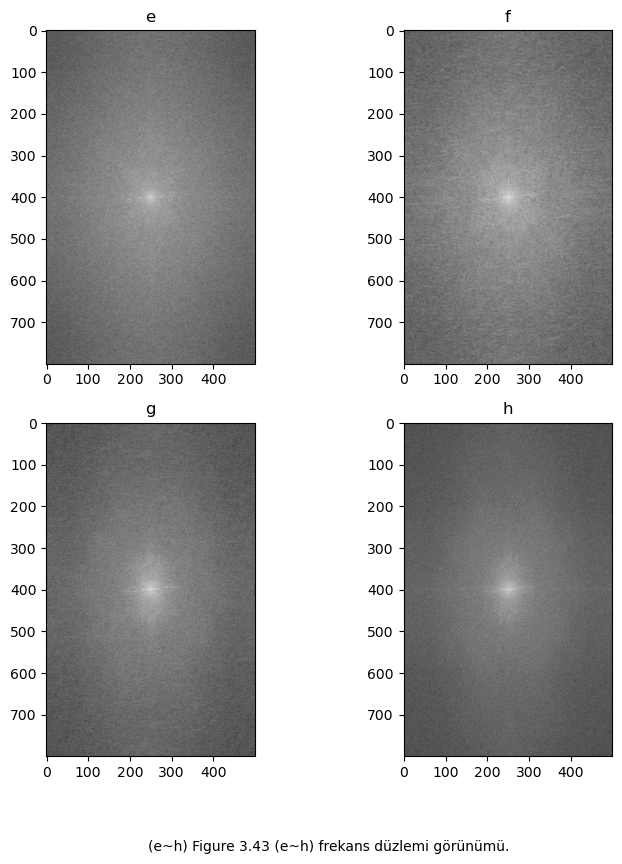

In [161]:
if __name__ == "__main__":
    fig343aFFT = "Fig0343(a)(skeleton_orig)_FFT.pgm"
    kVal, header, comment, width, height, receivedIntensity = mypgmread(fig343a)
    outputIntensity = my2Dfft(receivedIntensity, width, height)
    mypgmwrite(
        fig343aFFT, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    fig343bFFT = "Fig0343_b_FFT.pgm"
    kVal, header, comment, width, height, receivedIntensity = mypgmread(fig343b)
    outputIntensity = my2Dfft(receivedIntensity, width, height)
    mypgmwrite(
        fig343bFFT, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    fig343cFFT = "Fig0343_c_FFT.pgm"
    kVal, header, comment, width, height, receivedIntensity = mypgmread(fig343c)
    outputIntensity = my2Dfft(receivedIntensity, width, height)
    mypgmwrite(
        fig343cFFT, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    fig343dFFT = "Fig0343_d_FFT.pgm"
    kVal, header, comment, width, height, receivedIntensity = mypgmread(fig343d)
    outputIntensity = my2Dfft(receivedIntensity, width, height)
    mypgmwrite(
        fig343dFFT, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    fig343eFFT = "Fig0343_e_FFT.pgm"
    kVal, header, comment, width, height, receivedIntensity = mypgmread(fig343e)
    outputIntensity = my2Dfft(receivedIntensity, width, height)
    mypgmwrite(
        fig343eFFT, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    fig343fFFT = "Fig0343_f_FFT.pgm"
    kVal, header, comment, width, height, receivedIntensity = mypgmread(fig343f)
    outputIntensity = my2Dfft(receivedIntensity, width, height)
    mypgmwrite(
        fig343fFFT, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    fig343gFFT = "Fig0343_g_FFT.pgm"
    kVal, header, comment, width, height, receivedIntensity = mypgmread(fig343g)
    outputIntensity = my2Dfft(receivedIntensity, width, height)
    mypgmwrite(
        fig343gFFT, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    fig343hFFT = "Fig0343_h_FFT.pgm"
    kVal, header, comment, width, height, receivedIntensity = mypgmread(fig343h)
    outputIntensity = my2Dfft(receivedIntensity, width, height)
    mypgmwrite(
        fig343hFFT, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    description = "(a~d) Figure 3.43 (a~d) frekans düzlemi görünümü."
    myPGMDisplayQuadra(
        fig343aFFT, fig343bFFT, fig343cFFT, fig343dFFT, "a", "b", "c", "d", description
    )

    description2 = "(e~h) Figure 3.43 (e~h) frekans düzlemi görünümü."
    myPGMDisplayQuadra(
        fig343eFFT, fig343fFFT, fig343gFFT, fig343hFFT, "e", "f", "g", "h", description2
    )

Uygulamada süreklilik gösteremediğinden ayrı olarak frekans düzleminde gerçekleştirilebilen operasyonlar aşağıda uygulandı. Fakat görüntünün ters FFT'si alınamadığından yine gerçekleştirilen operasyonlar zaman düzleminde gözlemlenemedi.

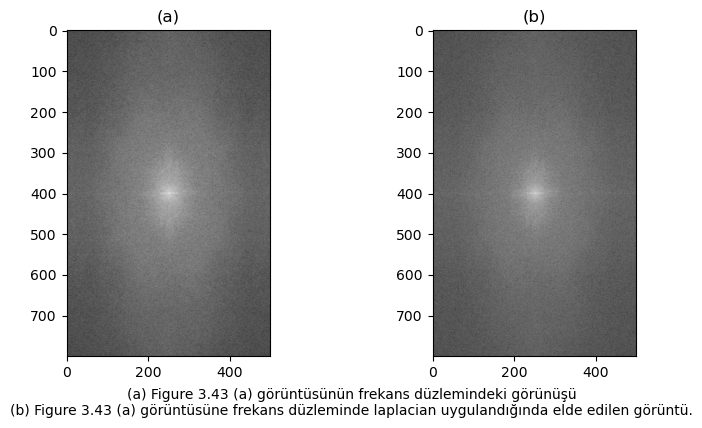

In [162]:
import math

if __name__ == "__main__":
    # H(u, v) = -4*pi*( u^2 + v^2 )
    fig343bFFTlaplacian = "fig343bFFT_laplacian.pgm"

    mask = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
    myLaplacianWithScaling(fig343aFFT, fig343bFFTlaplacian, mask)

    mypgmwrite(
        fig343bFFTlaplacian, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    myPGMDisplayDouble(fig343aFFT, fig343bFFTlaplacian, "(a)", "(b)", "(a) Figure 3.43 (a) görüntüsünün frekans düzlemindeki görünüşü\n(b) Figure 3.43 (a) görüntüsüne frekans düzleminde laplacian uygulandığında elde edilen görüntü.")

Aşağıda da frekans düzleminde Laplacian sharpening işlemi gerçekleştirildi.

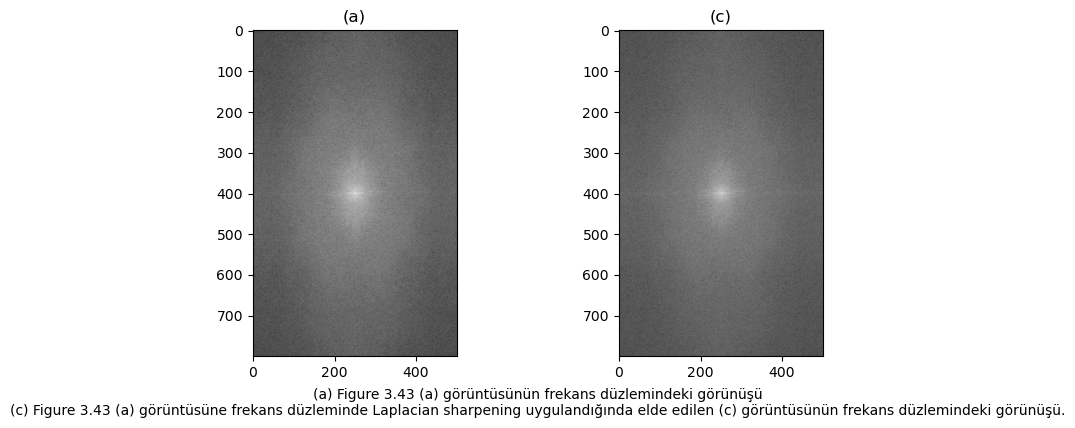

In [163]:
import math

if __name__ == "__main__":
    # H(u, v) = -4*pi*( u^2 + v^2 )
    fig343cFFTlaplacian = "fig34cbFFT_laplacian.pgm"

    mask = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
    mySharpenUsingLaplacian(fig343aFFT, fig343cFFTlaplacian, mask)

    mypgmwrite(
        fig343cFFTlaplacian, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    myPGMDisplayDouble(
        fig343aFFT,
        fig343cFFTlaplacian,
        "(a)",
        "(c)",
        "(a) Figure 3.43 (a) görüntüsünün frekans düzlemindeki görünüşü\n(c) Figure 3.43 (a) görüntüsüne frekans düzleminde Laplacian sharpening uygulandığında elde edilen (c) görüntüsünün frekans düzlemindeki görünüşü.",
    )

46, 48 ve 50 numaralı kod hücrelerinde görüntüler frekans düzleminden zamna düzlemine çevrilemediğinden yorumlanamadı. Fakat zaman düzleminde gerçekleştirilen uygulamanın frekans düzleminde de aynı çıktıyı vermesi beklenmektedir.

Aşağıda saat kulesi uygulaması yer almaktadır.

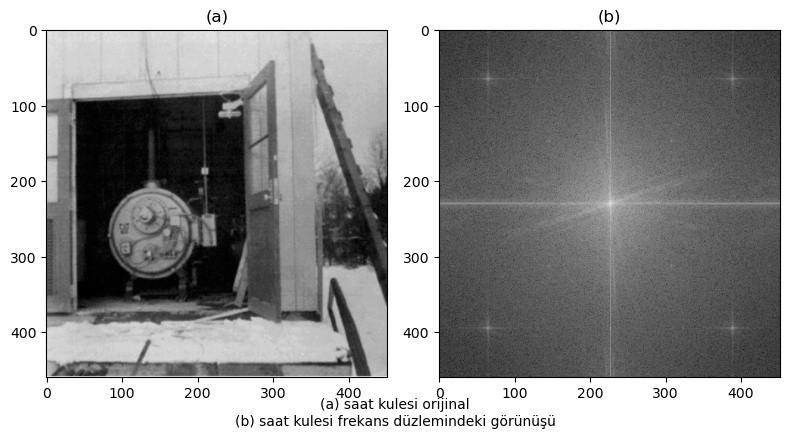

In [164]:
if __name__ == "__main__":
    saatKulesi = "figure_saat_kulesi.pgm"
    saatKulesiFFT = "figure_saat_kulesi_FFT.pgm"

    kVal, header, comment, width, height, receivedIntensity = mypgmread(saatKulesi)
    outputIntensity = my2Dfft(receivedIntensity, width, height)
    mypgmwrite(
        saatKulesiFFT, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    myPGMDisplayDouble(saatKulesi, saatKulesiFFT, "(a)", "(b)", "(a) saat kulesi orijinal\n(b) saat kulesi frekans düzlemindeki görünüşü")

Homomorfik filtre

In [167]:
def myHomomorphicFilter(image, width, height, gamma_l=0.3, gamma_h=1.5, d0=50):
    intensityList = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

    rows, cols = intensityList.shape
    r, c = np.meshgrid(
        np.arange(rows), np.arange(cols), indexing="ij"
    )

    center_r = rows // 2
    center_c = cols // 2

    # filtreyi oluştur
    h = (gamma_h - gamma_l) * (
        1 - np.exp(-((r - center_r) ** 2 + (c - center_c) ** 2) / (2 * d0**2))
    ) + gamma_l

    # frekans düzlemindeki görüntü verisine filtreyi uygula
    imageFiltered = intensityList * h

    return imageFiltered.astype(np.uint8).tobytes()  # bytes türünden dönüşümü yaparak filtrelenmiş görüntü verisini döndür

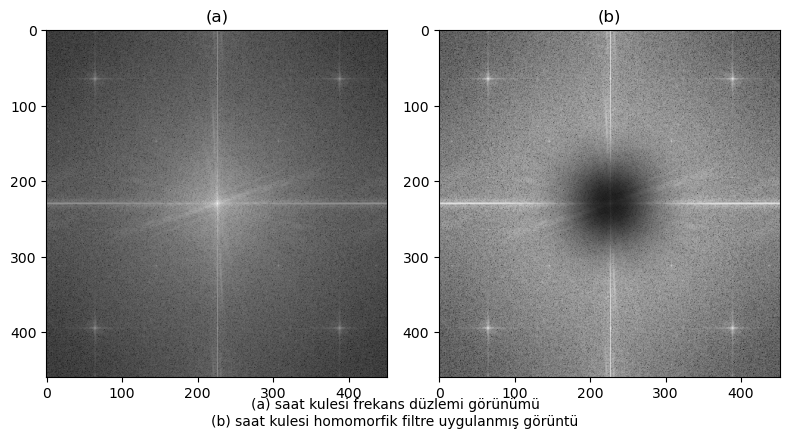

In [168]:
if __name__ == "__main__":
    saatKulesiFiltered = "figure_saat_kulesi_homomorphic_filtered.pgm"

    kVal, header, comment, width, height, receivedIntensity = mypgmread(saatKulesiFFT)
    outputIntensity = myHomomorphicFilter(receivedIntensity, width, height, gamma_l=0.3, gamma_h=1.5, d0=50)
    mypgmwrite(
        saatKulesiFiltered, kVal, header, comment, width, height, outputIntensity
    )  # işlenen görüntü yazdırılır

    myPGMDisplayDouble(
        saatKulesiFFT,
        saatKulesiFiltered,
        "(a)",
        "(b)",
        "(a) saat kulesi frekans düzlemi görünümü\n(b) saat kulesi homomorfik filtre uygulanmış görüntü",
    )

Homomorfik filtre uygulanan görüntü yukarıdadır. Inverse FFT uygulanamadığından görüntü zaman domeninde gösterilemedi. Fakat bu işlem sonucunda beklenen karanlık olan iç ortamın aydınlatılarak detayların açığa çıkarılmasıdır.